## Bayesian Networks Text Classification

> ### Artificial Intelligence - CA3
> ### Shakiba Bolbolian Khah - 810196426

- **About**:

Classification using Bayesian networks is one of the useful methods which helps us classify data based on train data. During this assignment, we are trying to classify different type of news using Bayesian network.



- **Data Preprocessing**:

To use Bayesian network, first we should preprocess raw data and make it ready. This includes several steps.

**important**: News are being trained with headers and description! By this way we do not have problem for which does not have description!

> **1.Stop Words Omition**:
> There is a special group of words which are frequent in all types of news. Since these words, such as am, is, are, they, etc, have negative impact on data analysis, they should be deleted. To do this work we can use `nltk` Python library. It offers a list of standard English stop words.
>
>**2.Lower Case Alphabet**:
> Obviously there is no different between "word" and "Word", so to consider them two different words, has its inevitable side effect because by this way we decrease the probability of presence of a word. Therefore we convert all capital characters to lower form.
>
>**3.Ponctuation Marks Omition**:
> Ponctutation marks have a little effect on type of news and consiering them makes situation and implementation way difficult with no significant effect. They just can help us find part of speech of words in a sentence. However in this inplementation we do not need part of speech. As a result to omit ponctuation marks will be helpful. This is true about numbers too.
>
>**4.Lemmatiazation vs Stemming**:
> To use words in sentences change them based on their part of speech. Plural form of nouns, adverbs and adjectives with same origins, infinitives, etc are different examples of this kind of change. There are different methods to obtain origins of words, which will be discussed later. So replacing words with thier origins is very important.
>
>
>**5.Tokenization**:
> Totally to tokenize sentences is the last preprocess operation we should do.

- **Bayesian Rule**:

Below came some explanations about Bayesian network and its rule which is used to classify data.

> $$P(c|x) = \frac{P(x|c) P(c)}{P(x)}$$
>
>
>- **$P(c|x)$:** As wanted in problem, it shows that how much is it possible that news have type c if it contains the word x. Clearly it is not easy to calculate. So we use Bayesian rule to obtain it from other probabilities.
>
>
>- **$P(x|c)$:** As it is clear it shows how mush is it possible to have the word like x in news of type c. To explain more, consider the word "city". What is the probability of presence of this word in travel news? To calculate this, we first need to have a dictionary to show the number of repeatition of each word in train data of a special type of news. for example the word "city" has been repeated in travel news 150 times. Now we need ttal number of words of travel news. Number of city division by total number of words in travel news will give us the probability of having the word city if the type of news is travel. 
>
>
>- **$P(c)$:** This refer to probability of being special type of news and can be calculated with division number of train data with category c on total number of train data.
>
>
>- **$P(x)$:** This shows the total probability of presence a word in train data. For instance the probability of having the word "world" in train data. Since it is the same in all calculation we do not consider it.
>
>
>
>As a result, the final relation which is used to find the prabability of being a special category came below:
>
>
>$$ P(c|x) = P({x}_1|c)P({x}_2|c)\ldots P({x}_n|c) P(c)$$


- **Training Process**:

After creating matrix, we need to measure the functionality of model. To do this, we first should have data with correct label to train it and then we need another group of data with correct label to test the model with and check the functionality and performance. It would be not a wise choice to select numbers of data with no attention to its category. So it is better to have a balance between training data category and test data category. To do this, we select a same portion data of each category. For example 80 percent of all data with travel category, 80 percent of business category and so on.

- **Date Preprocessing**:

In [1]:
import pandas as pd
import math
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

BUSINESS = 'BUSINESS'
STYLE = 'STYLE & BEAUTY'
TRAVEL = 'TRAVEL'

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+')

def lemmatizing(l):
    t = []
    for i in l:
        t.append(lemmatizer.lemmatize(i))
    return t

In [2]:
def fileReader(path, isTest):
    if(isTest):
        df = pd.read_csv(path, usecols = ['index','short_description','headline'])
    else:
        df = pd.read_csv(path, usecols = ['category','index','short_description','headline'])

    df['headline'] = df['headline'].str.lower()
    df['short_description'] = df['short_description'].str.lower()
    df['short_description'] = df['short_description'].fillna(' ')
    df['headline'] = df['headline'].fillna(' ')
    df['data'] = df['headline'] + ' ' + df['short_description']
    df['data'] = df['data'].apply(tokenizer.tokenize)
    df['data'] = df['data'].apply(lambda x: [item for item in x if item not in stopwords])
    df['data'] = df['data'].apply(lemmatizing)
    return df

df = fileReader("./Attachment/data.csv", False)
travelBag = df[df['category'] == 'TRAVEL']
beautyBag = df[df['category'] == 'STYLE & BEAUTY']
businessBag = df[df['category'] == 'BUSINESS']

travelIdx =  math.floor(0.8*len(travelBag))
trainTravelBag = travelBag[0: travelIdx]
evTravelBag = travelBag[travelIdx:]

beautyIdx =  math.floor(0.8*len(beautyBag))
trainBeautyBag = beautyBag[0: beautyIdx]
evBeautyBag = beautyBag[beautyIdx:]

businessIdx =  math.floor(0.8*len(businessBag))
trainBusinessBag = businessBag[0: businessIdx]
evBusinessBag = businessBag[businessIdx:]

- **Creating Dictionary**:

In [3]:
businessCount = {}
travelCount = {}
styleCount = {}

def countWords(l, category):
    for sen in l:
        for word in sen:
            if(category == BUSINESS):
                businessCount[word] = 2 if word not in businessCount else businessCount[word] + 1
                travelCount[word] = 1 if word not in travelCount else travelCount[word]
                styleCount[word] = 1 if word not in styleCount else styleCount[word]
            elif(category == STYLE):
                businessCount[word] = 1 if word not in businessCount else businessCount[word]
                travelCount[word] = 1 if word not in travelCount else travelCount[word]
                styleCount[word] = 2 if word not in styleCount else styleCount[word] + 1
            elif(category == TRAVEL):
                businessCount[word] = 1 if word not in businessCount else businessCount[word]
                travelCount[word] = 2 if word not in travelCount else travelCount[word] + 1
                styleCount[word] = 1 if word not in styleCount else styleCount[word]
            
            
countWords(trainBusinessBag['data'], BUSINESS)
countWords(trainTravelBag['data'], TRAVEL)
businessNum = sum(businessCount.values())
travelNum = sum(travelCount.values())

- **Phase I**:

In phase I we just train the model with two categories: Business and Travel!
To evaluate data it is enough to calculate each category probability and announce the maximum one. To calculate presicion and recall, we need 4 amount:
>
> 1. number of news which are travel and predicted as travel : trueTravel
> 2. number of news which are business and predicted as business : trueBusiness
> 3. number of news which are business but predicted as travel : falseTravel
> 4. number of news which are travel and predicted as business : falseBusiness
>
Then it is enough to calculate each value for each categort based on formula, which came below.

|Phase1|Travel | Business |
|--- | --- | --- |
| Recall | 0.9612359550561798 |0.9158091674462114 |
| Precision | 0.9500277623542477 |0.9341603053435115 |
| Accuracy | 0.9441909441909442 |

- Implementation:

In [4]:
def findCategoryPhase1(news):
    trainNum = (len(trainTravelBag) + len(trainBusinessBag))
    travelProb = len(trainTravelBag) / trainNum
    businessProb = len(trainBusinessBag) / trainNum
    for word in news['data']:
        if word in travelCount:
            travelProb = travelProb * (travelCount[word] / travelNum)
            businessProb = businessProb * (businessCount[word] / businessNum)
    return TRAVEL if travelProb > businessProb else BUSINESS

def phase1():
    trueTravel = 0
    falseTravel  = 0
    trueBusiness = 0
    falseBusiness = 0
    for index, row in evTravelBag.iterrows():
        if(findCategoryPhase1(row) == TRAVEL):
            trueTravel += 1
        else:
            falseBusiness += 1
    for index, row in evBusinessBag.iterrows():
        if(findCategoryPhase1(row) == BUSINESS):
            trueBusiness += 1
        else:
            falseTravel += 1
            
    accuracy = (trueBusiness + trueTravel ) / (trueBusiness + trueTravel + falseBusiness + falseTravel)
    print("Accuracy:   ", accuracy)
    
    print("\nTravel")
    precisionTravel = trueTravel / (trueTravel + falseTravel)
    recallTravel = trueTravel / (trueTravel + falseBusiness)
    print("Precision: ", precisionTravel)
    print("Recall:    ", recallTravel)
    
    print("\nBusiness")
    precisionBusiness = trueBusiness / (trueBusiness + falseBusiness)
    recallBusiness = trueBusiness / (trueBusiness + falseTravel)    
    print("Precision: ", precisionBusiness)
    print("Recall:    ", recallBusiness)
    
phase1()

Accuracy:    0.9441909441909442

Travel
Precision:  0.9500277623542477
Recall:     0.9612359550561798

Business
Precision:  0.9341603053435115
Recall:     0.9158091674462114


- **Phase II**:

In phase II Style & Beauty added to previous two categories.
To evaluate data it is enough to calculate each category probability and announce the maximum one. To calculate presicion and recall, we need 9 amounts according to confusion matrix which are similar to previous phase.
>
> **Confusion Matrix**:
>
>The Confusion matrix is one of the most intuitive and easiest metrics used for finding the correctness and accuracy of the model. In this case, it is a matrix with two dimensions: predicted and actual which each one has classes as same as categories. This matrix itself is not a performance metric but it is used to calculate all metrics. Its schema in this problem came below:
>> Cells' context are in formatted `x/y`! x shows the actual category and y determines predicted one. In final matrix every cell shows that how many tests were detected as category y but indeed they had category x.
>
>| || Actual | ||
|---| --- | --- | --- | --- |
| | | Travel | Business | Style |
| |  Travel| T/T | B/T  | S/T |
| Predicted | Business | T/B | B/B |  S/B |
|  |  Style & Beauty | T/S  | B/S | S/S |
>
>**Oversampling**:
>
>Sometimes data in calssification does not have good distribution. Due to this, model may have bios and pretend to predict data with one label more than another. In this example data do not have standard distribution and number of test data with label `Business` is less than others. It has side effects like significant difference between precision and recall and etc.
>>
>>**Solution**:
>> 
>>- There are different ways to solve this problem and one of them is to sample data with less amount more than others. For instance in this example we can take copy of some data with Business category. By this way we can have more data with category Business and solve the problem. Due to the approach I use in implementation, I did not face this problem so I did not copy data. It is necessary to mention that to copy data is not useful in all cases. The reason is that in this case we are aware of number of train and evaluation too. For example in phase 1 about 33 percent of train data was business category and remained one was travel. From this data we selected 80 percent of each category for training and left 20 percent for evaluation. So evaluation data has similar scale to train data, because of that to copy data does not have significant effect on result. As well as this, copying training data can cause overfitting!
>>
>>
>> - **About my approach** : What happen if we have a word in business category and we do not have it at all in travel? If it comes in a test, probabitlity of being travel news will be 0 because of one word! But what if we have a word which came in travel news but not in business? News containing both of these words niether can be travel nor business, however we know that it is not good at all. To solve it, we can assign a little probability to those words which come in one category and not in others. If we count number of words from 2, problem will be solved. By this way if the word x comes in travel news and does not come in business or style, it has a probability equal to $\frac{1}{total\;words}$. Sum of all probability will be 1 too. This can fix some problems too and helps us have better training.


A table of needed data came below and confusion matrix is shown in the output too.


|Phase1|Travel | Business | Style & Beauty |
|--- | --- | --- | --- |
| Recall | 0.949438202247191 |0.8877455565949486 | 0.9360967184801382 |
| Precision | 0.9194776931447225 |0.9055343511450382 | 0.9564705882352941 |
| Accuracy | | 0.930004361098997 |

- Implementation:

Accuracy:  0.930004361098997

Travel
Precision:  0.9194776931447225
Recall:     0.949438202247191

Business
Precision:  0.9055343511450382
Recall:     0.8877455565949486

Beauty & Style
Precision:  0.9564705882352941
Recall:     0.9360967184801382


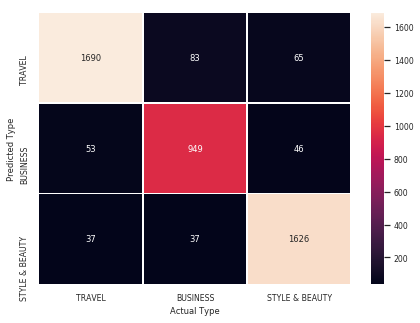

In [5]:
countWords(trainBeautyBag['data'], STYLE)
styleNum = sum(styleCount.values())
businessNum = sum(businessCount.values())
travelNum = sum(travelCount.values())

def findCategoryPhase2(news):
    trainNum = len(trainTravelBag) + len(trainBusinessBag) + len(trainBeautyBag)
    travelProb = len(trainTravelBag) / trainNum
    businessProb = len(trainBusinessBag) / trainNum
    beautyProb = len(beautyBag) / trainNum
    for word in news['data']:
        if word in travelCount:
            travelProb = travelProb * (travelCount[word] / travelNum)
            businessProb = businessProb * (businessCount[word] / businessNum)
            beautyProb = beautyProb * (styleCount[word] / styleNum)
    probs = {travelProb:TRAVEL, businessProb:BUSINESS, beautyProb:STYLE}
    return probs[max(probs)]

def phase2():
    dataMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    
    for index, row in evTravelBag.iterrows():
        tag = findCategoryPhase2(row)
        if(tag == TRAVEL):
            dataMatrix[0][0] += 1
        elif(tag == BUSINESS):
            dataMatrix[1][0] += 1
        else:
            dataMatrix[2][0] += 1
            
    for index, row in evBusinessBag.iterrows():
        tag = findCategoryPhase2(row)
        if(tag == BUSINESS):
            dataMatrix[1][1] += 1
        elif(tag == TRAVEL):
            dataMatrix[0][1] += 1
        else:
            dataMatrix[2][1] += 1
      
    for index, row in evBeautyBag.iterrows():
        tag = findCategoryPhase2(row)
        if(tag == STYLE):
            dataMatrix[2][2] += 1
        elif(tag == TRAVEL):
            dataMatrix[0][2] += 1
        else:
            dataMatrix[1][2] += 1
           
    labels = [TRAVEL, BUSINESS, STYLE]
    df_cm = pd.DataFrame(dataMatrix, index = [i for i in labels],
                  columns = [i for i in labels])
    plt.figure(figsize = (7,5))
    sn.set(font_scale= 0.7)
    sn.heatmap(df_cm, annot=True, fmt="d", linewidths=.5)
    plt.xlabel('Actual Type')
    plt.ylabel('Predicted Type')
    
    accuracy = (dataMatrix[0][0]+dataMatrix[1][1]+dataMatrix[2][2]) / (sum(dataMatrix[0])+sum(dataMatrix[1])+sum(dataMatrix[2]))
    print("Accuracy: ", accuracy)
    
    travelPrec = dataMatrix[0][0] / (sum(dataMatrix[0]))
    travelRecall = dataMatrix[0][0] / (dataMatrix[0][0]+dataMatrix[1][0]+dataMatrix[2][0])
    print("\nTravel")
    print("Precision: ", travelPrec)
    print("Recall:    ", travelRecall)
    
    businessPrec = dataMatrix[1][1] / (sum(dataMatrix[1]))
    businessRecall = dataMatrix[1][1] / (dataMatrix[0][1]+dataMatrix[1][1]+dataMatrix[2][1])
    print("\nBusiness")
    print("Precision: ", businessPrec)
    print("Recall:    ", businessRecall)
    
    stylePrec = dataMatrix[2][2] / (sum(dataMatrix[2]))
    styleRecall = dataMatrix[2][2] / (dataMatrix[0][2]+dataMatrix[1][2]+dataMatrix[2][2])
    print("\nBeauty & Style")
    print("Precision: ", stylePrec)
    print("Recall:    ", styleRecall)
    
    
phase2()

- **Test Data Classification**:

It is similar to previous parts but we do not calculate preformance metrics and just save categories in .csv file.

In [6]:
def fillTest(path):
    testDf = fileReader(path, True)
    output = pd.DataFrame(columns = ['index', 'category'])
    for index, row in testDf.iterrows():
        tag = findCategoryPhase2(row)
        output = output.append({'index':row['index'], 'category':tag}, ignore_index=True)
    output.to_csv(r'./output.csv', index = False, header=True)
    
    
fillTest("./Attachment/test.csv")

- **Quesions**

**1.** It is better to take a look at the definition of lemmatiazation and stemming. As said before, It is vital to not count different format of words with the same origin and we should consider as one word to have better result. There are two methods to do this which came below.
>
>**Stemming**: It is not a very smart way. Actually it just cuts the end of words to omit postfixes like ing, ed, s, etc with a hope that it may be correct. So stem function just cuts the word with no word analysis. By this way some words like prties converts to prti with no meaning. However it can be helpful in some cases.
>
>**Lemmatiazation**: A smarter algorithm which can decide based on part of speech of words in sentences. For example it can change the word better to good if it recieves the part of speech of word as adverb. By this way lemmatiazation can detect words and convert most of them into right format. 
>
>>**Which is better?**: Lemmatiazation is obviously better. It is enough to consider the example of parties. If you have the word party 50 times in your text and parties came 50 times too, by applying stemming you will have 50 'party' and 50 'parti' in your dictionary. However by applying lemmatiazation you will have 100 'party'. In conclusion lemmatiazation is better becauses it prevents data distribution. However it is not easy to use completely. `pos_tag` function in `nltk` can help us find part of speech of each word in sentences. `lemmatize` function in `nltk` just works for main four part of speech : noun, verb, adverb and adjective. On the other hand `pos_tag` returns different parts of speech with huge variaty. So it is not very easy to convert other tag into main one. So in this assignment lemmatizer is used with no part of speech, but is still smarter than stemming.
>

**2.** Let us explain tf-idf weight.
>
> **What is tf-idf?** 
>
>tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection . It is often used as a weighting factor in text calssification.
>>
>> **TF**: TF shows that how much a word is important in a document. It is related to times of appearance in a same document. It is computed as the frequency of a token in a document in bag of words model. Its relation came below.
>>
>>$$\mathrm{TF = \frac{Number\;of\;times\;the\;token\;appears\;in\;the\;document}{Total\;Number\;of\;Tokens\;in\;the\;document}}$$
>>
>> **IDF**: IDF rewards tokens that are rare overall in a dataset. If a rare word occurs in two documents, then it is more important to the meaning of each document. It is computed like below. `t` is a selected token and `U` is set of documents.
>>
>>$$\mathrm{IDF(t) = \frac{Total\;number\;of\;documents}{Number\;of\;documents\;in\;U\;that\;contain\;t}}$$
>>
>> **TF-IDF** : At last it will be computed like below.
>>
>>$$\mathrm{TF-IDF = TF \times IDF}$$
>>
>**How to use tf-idf in Bayesian model?**
>
>It is enough to consider tf-idf instead of counting number of each appearance of each word. With this implementation, $P(c|x)$ ,in a situation where x is category and c is a word, is computed by this way:
>
>$$\mathrm{P(c|x) = \frac{Number\;of\;c\;in\;category + 1}{Number\;of\;all\;words+Number\;of\;distinct\;words}}$$
>
> Now when we want to use tf-idf, we do not need simple counting anymore and we can use tf-idf weight instead which came below.
>
>$$\mathrm{P(c|x) = \frac{tf-idf\;weight\;of\;c + 1}{Sum\;of\;all\;tf-idf\;weights+Number\;of\;distinct\;words}}$$
>

**3.** Precision pays attention to proportion of prediction which was correct. This does not pay attention to cases which were not predicted correctly. However recall tells us what proportion of a special category data was predicted correctly too. In recall we pay attention to proportion which were predicted wrong. In conclusion if a system just pay attention to precision, although it shows high number of correct predict, it can cause high number of wrong predict too. For example consider a model which diagnoses cancer. If it has high precision, it shows that among those were predicted as having cancer, high number had actually cancer. In this case we forget all people who had cancer and model did not diagnose so they can die! Recall can help us to find out how many people whose cancer result was predicted false by model had cancer actually and now they are in danger.


**4.** As it was described before, if we consider the probability of a word which has come in one category as 0 in others. For example if the word `Tabriz` comes in travel category not others, in this method, probability of being business or style & beauty will be 0 because of one word! Obviously it is not accurate and it is better to consider a little probability for a category on which word has not come at all. As I told, I did this by counting number of repeatition from 2 instead of one. It means that I assume 1 for number of appearance of a word which has never come in a category.